In [3]:
#Checking version

import IPython
print("Ipython Version: %6.6s" %IPython.__version__)

import numpy as np
print("Numby version: %6.6s" %np.__version__)

import scipy as sp
print("Scipy version: %6.6s" %sp.__version__)

import pandas as pd
print("Pandas version: %6.6s" %pd.__version__)

import matplotlib
print("Matplotlib: %6.6s" %matplotlib.__version__)

import sklearn
print("Scikit-Learn: %6.6s" %sklearn.__version__)




Ipython Version:  4.1.2
Numby version: 1.10.4
Scipy version: 0.17.0
Pandas version: 0.18.0
Matplotlib:  1.5.1
Scikit-Learn: 0.17.1


In [10]:
import json
path = 'Ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)] #uses comprehension

#result of this call are the list of dictionaries
records[0]


'America/New_York'

In [11]:
#accessing the individual dictionary
records[0]['tz']

'America/New_York'

In [14]:
#Counting Time Zones
time_zones = [rec['tz'] for rec in records] #Error because not all records
                                       # have  time zone field

America/New_York
America/Denver
America/New_York
America/Sao_Paulo
America/New_York
America/New_York
Europe/Warsaw



America/Los_Angeles
America/New_York
America/New_York


KeyError: 'tz'

In [19]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[1:10]

['America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [28]:
#one way to count timezones:
def get_count(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x]+=1
        else :
            counts[x]=1
    return(counts)

# Bit more concise:
def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x]+=1
    return counts

counts = get_count(time_zones)

#counts is a dictionary
print(type(counts))
#keys are the timezones and the values are the counts

counts['America/Denver']
type(counts)

counts2 = get_count(time_zones)
counts['America/Denver']

<class 'dict'>


191

In [40]:
#Top 10 time-zones and their count

def top_counts(count_dict, n=10):
    value_key_pairs =[(count,tz) for tz,count in count_dict.items()]
    #The dictionary will contain time zones and counts of the timezone
    #collect the (count,tz) pair in a list
    # need to record (count, tz), so that we can sort the list on counts

    value_key_pairs.sort() #Sort the list of tuples on counts
    return value_key_pairs[-n:] #Report the top 10 results; List is sorted 
                                # in descending order

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [37]:
#using collections.Counter from Python Std Library:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [43]:
#Counting TimeZone with pandas
from pandas import DataFrame, Series
import pandas as pd
frame = DataFrame(records)
frame[1:5]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [44]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [47]:
tz_counts = frame['tz'].value_counts()
tz_counts[1:10]

                       521
America/Chicago        400
America/Los_Angeles    382
America/Denver         191
Europe/London           74
Asia/Tokyo              37
Pacific/Honolulu        36
Europe/Madrid           35
America/Sao_Paulo       33
Name: tz, dtype: int64

In [49]:
clean_tz = frame['tz'].fillna('Missing') #Fillna function can be used for
clean_tz[clean_tz == ''] = 'Unknown' # Fill empty string as unknown
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

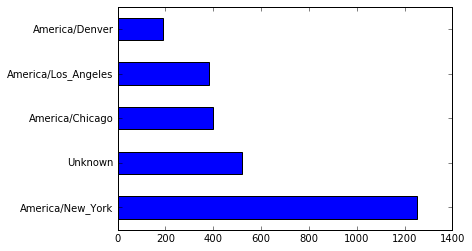

In [52]:
%matplotlib inline #Needed else matplot does not show map inline
tz_counts[:5].plot(kind = 'barh', rot = 0)

In [55]:
#The 'a' field

frame['a'][1:5]
#contains information about the browser, device, or application used to 
#perform URL shortening

1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [56]:
#split off first token in string and make summary of user behavior
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [57]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [58]:
#Decomposing the top time zone into Windows vs non-windows
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='<U11')